In [3]:
#IMPORTING ALL THE PACKAGES REQUIRED FOR MY MODEL
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [4]:
#STEP-1:
#DATA COLLECTION
df=pd.read_excel("C:\\Users\\trigo\\Downloads\\Iris Flower.xlsx",index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [5]:
#STEP-2:
#DATA PREPROCESSING
df.head(100)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
96,5.7,3.0,4.2,1.2,Iris-versicolor
97,5.7,2.9,4.2,1.3,Iris-versicolor
98,6.2,2.9,4.3,1.3,Iris-versicolor


In [6]:
df.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150],
      dtype='int64', name='Id', length=150)

In [7]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.shape

(150, 5)

In [9]:
df.size

750

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df["SepalLengthCm"].mean()

5.843333333333334

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [13]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
#STEP-3:EXPLORATORY DATA ANALYSIS
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
#HENCE ALL THE COLUMNS HAVE NO NULL VALUES SO WE DONT HAVE TO WORK ON NULL VALUES .

In [16]:
#ENCODING THE SPECIES COLUMN:
le=LabelEncoder()
df["Species_new"]=le.fit_transform(df["Species"])
df.drop(["Species"],axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_new
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


In [17]:
df["Species_new"].unique()

array([0, 1, 2])

In [18]:
#HERE, 0 STANDS FOR IRIS-SETOSA
#      1 STANDS FOR  IRIS-VERSICOLOR
#      2 STANDS FOR IRIS-VIRGINICA.

In [19]:
#STEP-4: CHECKING FOR CORRELATION :
corre=df.corr()
corre

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_new
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species_new,0.782561,-0.419446,0.949043,0.956464,1.000000


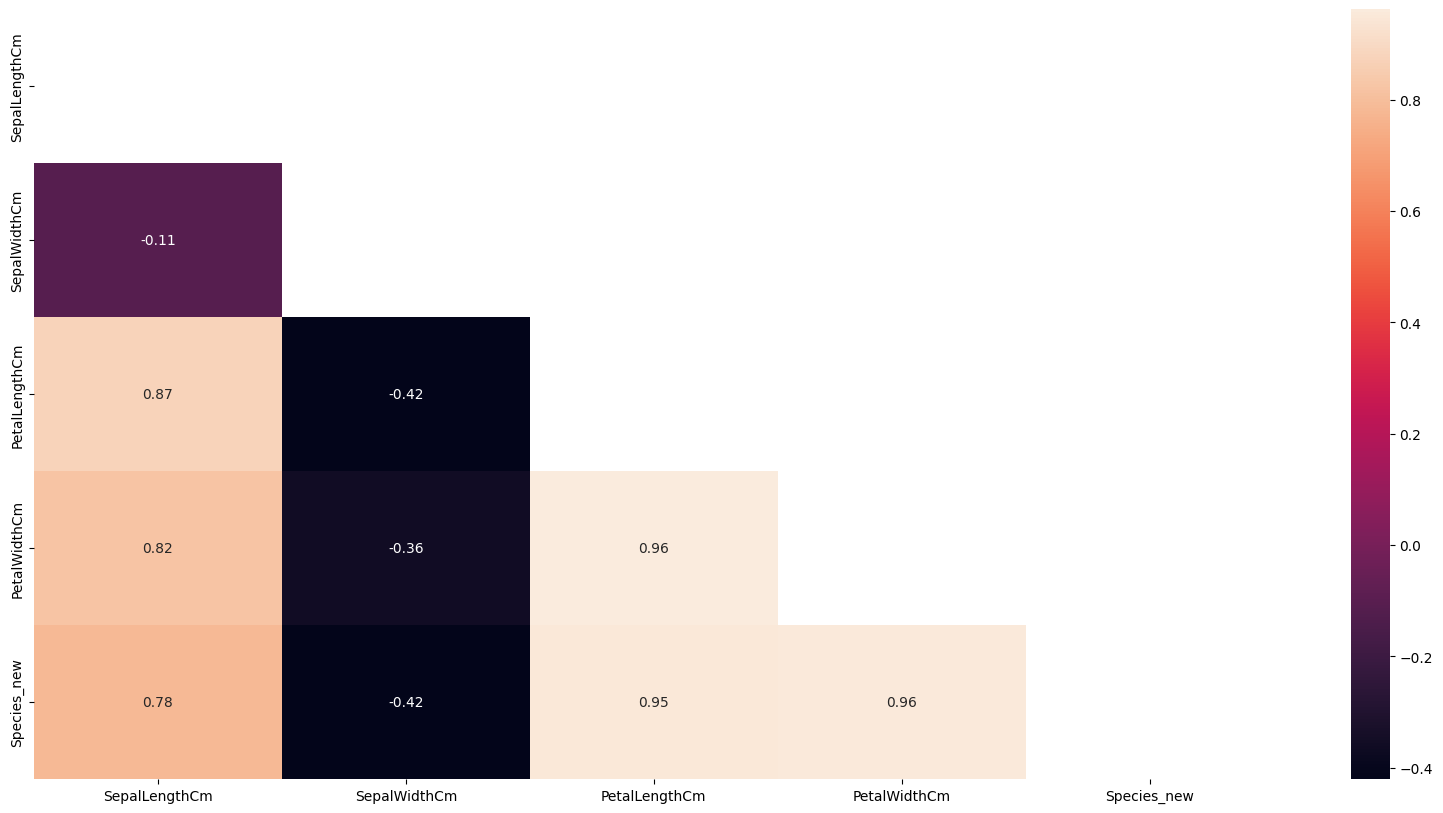

In [20]:
mask=np.triu(corre)
plt.figure(figsize=(20,10))
sns.heatmap(corre,mask=mask,annot=True,fmt=".2f")
plt.show()

In [21]:
#FROM THE ABOVE HEATMAP PLOT WE SEE THAT THE OUR TARGET_COLUMN THAT IS SPECIES NEW IS HIGHLY DEPENDENT ON COLUMNS PETALWIDTH,PETALLENGTH,SEPALLENGTH BUT
#LESS DEPENDENT ON SEPALWIDTH.LET US SEE FORWARD HOW OUR MODEL PERFORMS BY TAKING SEPALWIDTH AND WITHOUT TAKING SEPALWIDTH.

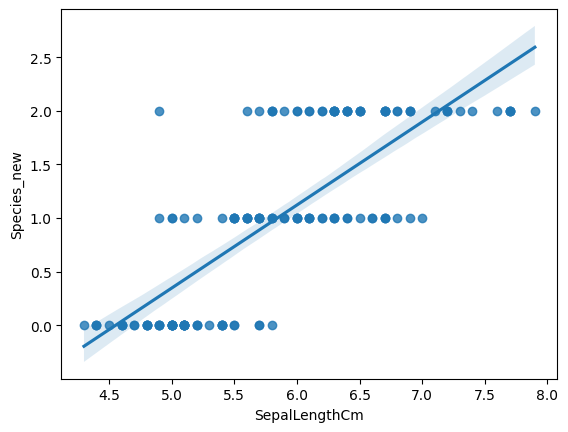

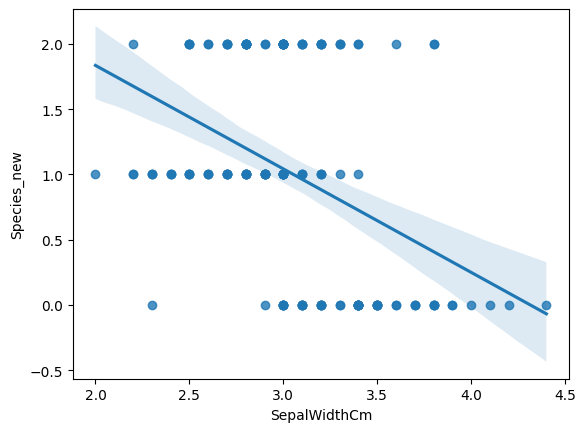

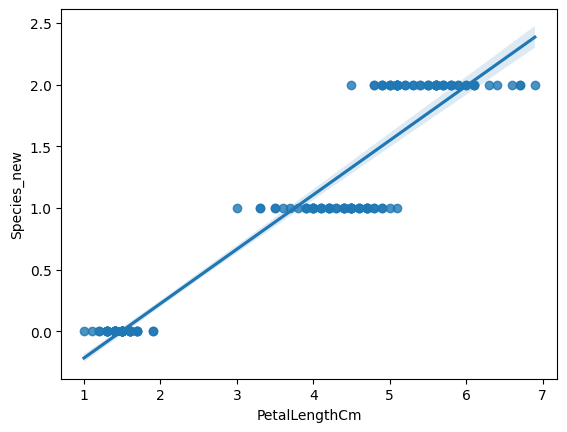

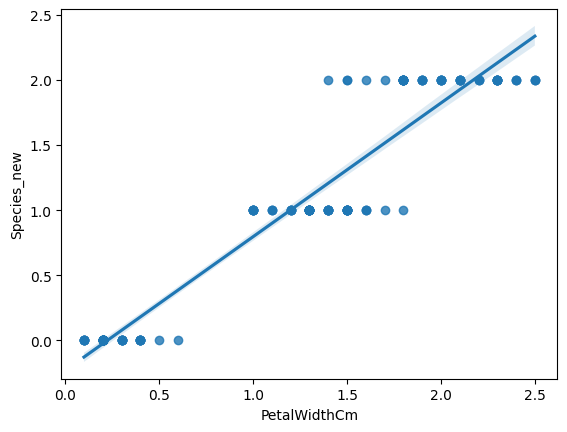

In [22]:
#STEP-5: VISUALISATION:
columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for col in columns:
    sns.regplot(x=df[col],y=df["Species_new"])
    #plt.xlabel(df[col])
    #plt.ylabel("Species_new")
    plt.show()

In [23]:
#SO FROM THE ABOVE VISUALISATION IT IS CLEAR THAT EXCEPT FOR SEPALWIDTH ALL THE OTHER COLUMNS SHOWS THAT AS THE LENGTH OF THE GIVEN COLUMN INCREASES CLASSIFICATION CHANGES FROM 
#IRIS-SETOSA TO IRIS-VERSICOLOR TO IRIS-VERGINICA

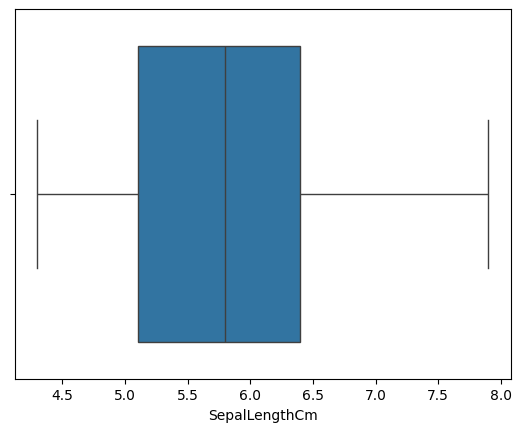

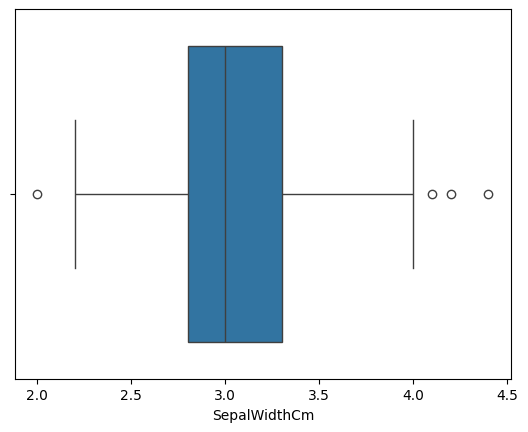

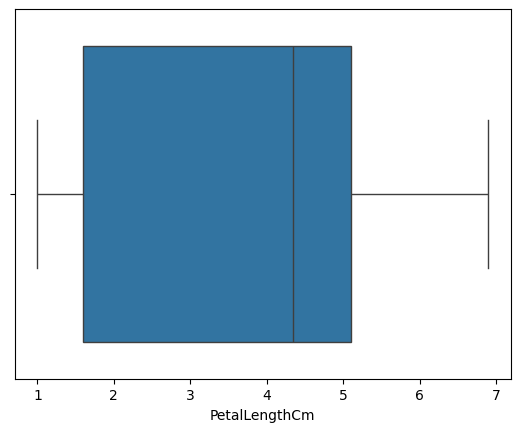

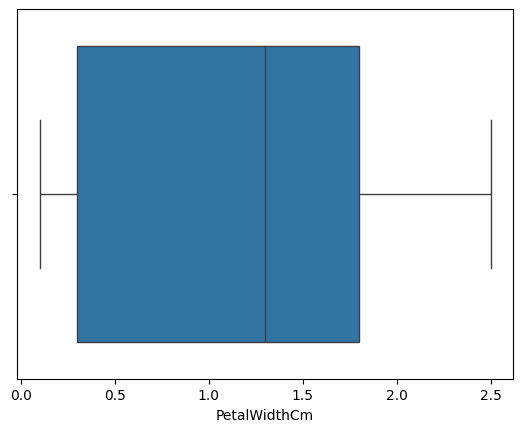

In [24]:
#BOX PLOT FOR OUTLIERS PRESENT
for col in columns:
    sns.boxplot(x=df[col])
    plt.show()

In [25]:
#SO FROM THE ABOVE BOX PLOTS  EXCEPT FOR SEPALWIDTH NONE OF THE FEATURES HAVE OUTLIERS PRESENT IN IT.SO LETS CHECK FOR THE OUTLIERS CORRECTION AND SEE IF WE CAN 
#REMOVE IT OR ELSE DROP THAT FEATURE.

In [26]:
#STEP-6: BUILDING MODEL
x=df.drop(["Species_new","SepalWidthCm"],axis=1)
y=df["Species_new"]

In [27]:
x

,SepalLengthCm,PetalLengthCm,PetalWidthCm
Id,,,
1,5.1,1.4,0.2
2,4.9,1.4,0.2
3,4.7,1.3,0.2
4,4.6,1.5,0.2
5,5.0,1.4,0.2
...,...,...,...
146,6.7,5.2,2.3
147,6.3,5.0,1.9
148,6.5,5.2,2.0


In [28]:
y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species_new, Length: 150, dtype: int32

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


In [30]:
#SCALING THE INPUT FEATURES TO REDUCE MEAN AND STANDARD DEVIATION
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [31]:
xtrain.mean()

-1.2089095157029481e-16

In [32]:
#SO HERE WE CAN THAT THE MEAN OF THE INPUT TRAINING DATASETS HAS GOT REDUCED, INITIALLY IT WAS ABOVE 5.

In [33]:
#MODEL1-LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xtrain,ytrain)

LogisticRegression()

In [34]:
LR.score(xtrain,ytrain) 

0.95

In [35]:
ypred=LR.predict(xtest)
ypred

array([0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       2, 1, 2, 2, 1, 0, 0, 0])

In [36]:
LR.score(xtest,ytest) #GOOD ACCURACY ,MORE THAN TRAINING SCORE.

1.0

In [69]:
CR1=classification_report(ypred,ytest,output_dict=True)
CR1=pd.DataFrame(CR1).transpose()
CR1

,precision,recall,f1-score,support
0,1.0,1.0,1.0,14.0
1,1.0,1.0,1.0,9.0
2,1.0,1.0,1.0,7.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0


In [70]:
#ALL MY ABOVE SCORES ARE PRETTY GOOD.

In [72]:
cm1=confusion_matrix(ypred,ytest)
cm

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  7]], dtype=int64)

In [73]:
#MODEL2:DECISION TREE 
from sklearn.tree import DecisionTreeClassifier
tree1=DecisionTreeClassifier()
tree1.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [74]:
tree1.score(xtrain,ytrain)

1.0

In [75]:
ypred=tree1.predict(xtest)
ypred

array([0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       2, 1, 2, 2, 1, 0, 0, 0])

In [76]:
tree1.score(xtest,ytest)

1.0

In [77]:
CR2=classification_report(ypred,ytest,output_dict=True)
CR2=pd.DataFrame(CR2).transpose()
CR2

,precision,recall,f1-score,support
0,1.0,1.0,1.0,14.0
1,1.0,1.0,1.0,9.0
2,1.0,1.0,1.0,7.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0


In [78]:
cm2=confusion_matrix(ypred,ytest)
cm2

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  7]], dtype=int64)

In [79]:
#SO THE DECISION TREE ALSO GIVES A HIGH ACCURACY.ALTHOUGH IT IS PRONE TO OVERFITTING, BUT MY MODEL HAS NOT BEEN OVERFITTED.

In [47]:
#MODEL-3:KNN MODEL
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [49]:
knn.score(xtrain,ytrain)

0.9583333333333334

In [50]:
ypred=knn.predict(xtest)
ypred

array([0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       2, 1, 2, 2, 1, 0, 0, 0])

In [51]:
knn.score(xtest,ytest)

1.0

In [80]:
CR3=classification_report(ypred,ytest,output_dict=True)
CR3=pd.DataFrame(CR3).transpose()
CR3

,precision,recall,f1-score,support
0,1.0,1.0,1.0,14.0
1,1.0,1.0,1.0,9.0
2,1.0,1.0,1.0,7.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0


In [81]:
cm3=confusion_matrix(ypred,ytest)
cm3

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  7]], dtype=int64)

In [82]:
#HENCE MY KNN MODEL GIVES THE SAME GOOD ACCURACY AS THE ABOVE.THOUGH IT IS LAZY LEARNER ALGORITHM , INSPITE OF THAT IT PERFORMS WELL ON THE TEST DATA.

In [83]:
#MODEL-4:SUPPORT VECTOR MACHINE
from sklearn.svm import SVC

In [84]:
support=SVC()
support.fit(xtrain,ytrain)

SVC()

In [57]:
support.score(xtrain,ytrain)

0.9583333333333334

In [58]:
ypred=support.predict(xtest)
ypred

array([0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       2, 1, 2, 2, 1, 0, 0, 0])

In [59]:
support.score(xtest,ytest)

1.0

In [85]:
CR4=classification_report(ypred,ytest,output_dict=True)
CR4=pd.DataFrame(CR4).transpose()
CR4

,precision,recall,f1-score,support
0,1.0,1.0,1.0,14.0
1,1.0,1.0,1.0,9.0
2,1.0,1.0,1.0,7.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0


In [86]:
#THE MODEL PERFORMS WITH HIGH ACCURACY.

In [87]:
#MODEL-5:NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB

In [88]:
GN=GaussianNB()
GN.fit(xtrain,ytrain)

GaussianNB()

In [89]:
GN.score(xtrain,ytrain)

0.9416666666666667

In [90]:
xtest
#ypred=GN.predict(xtest)
#ypred

array([[-1.04890694, -1.37585241, -1.40445528],
       [-1.04890694, -1.43431639, -1.40445528],
       [ 0.67027712,  0.26113913,  0.06921799],
       [-1.1717058 , -1.43431639, -1.40445528],
       [-0.5577115 , -1.25892444, -1.40445528],
       [-1.29450467, -1.31738843, -1.40445528],
       [ 0.67027712,  1.02117091,  1.14098036],
       [ 0.30188053,  0.49499506,  0.20318828],
       [ 0.79307598,  0.72885099,  1.00701006],
       [ 0.54747826,  0.61192303,  0.33715858],
       [ 2.14386346,  1.60581075,  1.14098036],
       [-0.80330922, -1.43431639, -1.40445528],
       [-0.5577115 , -1.49278038, -1.13651468],
       [ 1.0386737 ,  0.31960311,  0.20318828],
       [ 0.17908167,  0.37806709,  0.47112888],
       [ 0.79307598,  0.43653108,  0.33715858],
       [ 0.91587484,  0.43653108,  0.06921799],
       [-1.29450467, -1.31738843, -1.40445528],
       [-0.5577115 , -1.25892444, -1.13651468],
       [ 1.0386737 ,  1.13809888,  0.73906947],
       [-1.54010239, -1.43431639, -1.404

In [91]:
ypred=GN.predict(xtest)
ypred

array([0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       2, 1, 2, 2, 1, 0, 0, 0])

In [92]:
GN.score(xtest,ytest)

1.0

In [93]:
CR5=classification_report(ypred,ytest,output_dict=True)
CR5=pd.DataFrame(CR5).transpose()
CR5

,precision,recall,f1-score,support
0,1.0,1.0,1.0,14.0
1,1.0,1.0,1.0,9.0
2,1.0,1.0,1.0,7.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0


In [94]:
cm5=confusion_matrix(ypred,ytest)
cm5

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  7]], dtype=int64)

In [99]:
#NOW TAKING THE SEPAL WIDTH AND CALCULATING OUR MODELS PERFORMANCE.
x1=df.drop(["Species_new"],axis=1)
y1=df["Species_new"]

In [100]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.2)

In [101]:
#SCALING THE INPUT FEATURES TO REDUCE MEAN AND STANDARD DEVIATION
sc=StandardScaler()
xtrain1=sc.fit_transform(xtrain1)
xtest1=sc.transform(xtest1)

In [102]:
#MODEL1-LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
LR1=LogisticRegression()
LR1.fit(xtrain1,ytrain1)

LogisticRegression()

In [103]:
LR1.score(xtrain1,ytrain1) 

0.95

In [104]:
ypred1=LR1.predict(xtest1)
ypred1

array([1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 1, 1, 0, 1])

In [105]:
LR1.score(xtest1,ytest1)

0.9666666666666667

In [106]:
CR1=classification_report(ypred1,ytest1,output_dict=True)
CR1=pd.DataFrame(CR1).transpose()
CR1

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,11.000000
1,1.000000,0.900000,0.947368,10.000000
2,0.900000,1.000000,0.947368,9.000000
accuracy,0.966667,0.966667,0.966667,0.966667
macro avg,0.966667,0.966667,0.964912,30.000000
weighted avg,0.970000,0.966667,0.966667,30.000000


In [107]:
cm1=confusion_matrix(ypred1,ytest1)
cm1

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

In [108]:
#MODEL2:DECISION TREE 
from sklearn.tree import DecisionTreeClassifier
tree1=DecisionTreeClassifier()
tree1.fit(xtrain1,ytrain1)

DecisionTreeClassifier()

In [109]:
tree1.score(xtrain1,ytrain1)

1.0

In [110]:
ypred=tree1.predict(xtest1)
ypred

array([1, 2, 1, 2, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 1, 1, 0, 1])

In [111]:
tree1.score(xtest1,ytest1)

1.0

In [112]:
CR2=classification_report(ypred1,ytest1,output_dict=True)
CR2=pd.DataFrame(CR2).transpose()
CR2

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,11.000000
1,1.000000,0.900000,0.947368,10.000000
2,0.900000,1.000000,0.947368,9.000000
accuracy,0.966667,0.966667,0.966667,0.966667
macro avg,0.966667,0.966667,0.964912,30.000000
weighted avg,0.970000,0.966667,0.966667,30.000000


In [113]:
cm2=confusion_matrix(ypred1,ytest1)
cm2

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

In [114]:
#MODEL-3:KNN MODEL
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn=KNeighborsClassifier()
knn.fit(xtrain1,ytrain1)

KNeighborsClassifier()

In [117]:
knn.score(xtrain1,ytrain1)

0.9666666666666667

In [120]:
ypred1=knn.predict(xtest1)
ypred1

array([1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 1, 1, 0, 1])

In [123]:
knn.score(xtest1,ytest1)

0.9666666666666667

In [121]:
CR3=classification_report(ypred1,ytest1,output_dict=True)
CR3=pd.DataFrame(CR3).transpose()
CR3

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,11.000000
1,1.000000,0.900000,0.947368,10.000000
2,0.900000,1.000000,0.947368,9.000000
accuracy,0.966667,0.966667,0.966667,0.966667
macro avg,0.966667,0.966667,0.964912,30.000000
weighted avg,0.970000,0.966667,0.966667,30.000000


In [124]:
cm3=confusion_matrix(ypred1,ytest1)
cm3

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

In [125]:
#MODEL-4:SUPPORT VECTOR MACHINE
from sklearn.svm import SVC

In [126]:
support=SVC()
support.fit(xtrain1,ytrain1)

SVC()

In [127]:
support.score(xtrain1,ytrain1)

0.9666666666666667

In [128]:
ypred1=support.predict(xtest1)
ypred1

array([1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 1, 1, 0, 1])

In [129]:
support.score(xtest1,ytest1)

0.9666666666666667

In [130]:
CR4=classification_report(ypred1,ytest1,output_dict=True)
CR4=pd.DataFrame(CR4).transpose()
CR4

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,11.000000
1,1.000000,0.900000,0.947368,10.000000
2,0.900000,1.000000,0.947368,9.000000
accuracy,0.966667,0.966667,0.966667,0.966667
macro avg,0.966667,0.966667,0.964912,30.000000
weighted avg,0.970000,0.966667,0.966667,30.000000


In [131]:
#MODEL-5:NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB

In [133]:
GN=GaussianNB()
GN.fit(xtrain1,ytrain1)

GaussianNB()

In [134]:
GN.score(xtrain1,ytrain1)

0.9583333333333334

In [135]:
ypred1=GN.predict(xtest1)
ypred1

array([1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 1, 1, 0, 1])

In [136]:
GN.score(xtest1,ytest1)

0.9666666666666667

In [137]:
CR5=classification_report(ypred1,ytest1,output_dict=True)
CR5=pd.DataFrame(CR5).transpose()
CR5

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,11.000000
1,1.000000,0.900000,0.947368,10.000000
2,0.900000,1.000000,0.947368,9.000000
accuracy,0.966667,0.966667,0.966667,0.966667
macro avg,0.966667,0.966667,0.964912,30.000000
weighted avg,0.970000,0.966667,0.966667,30.000000


In [138]:
cm5=confusion_matrix(ypred1,ytest1)
cm5

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

In [ ]:
#SO FROM THE ABOVE RESULTS WE SEE THAT OUR THERE IS A SLIGHT ACCURACY DIFFERENCE WITH OR WITHOUT TAKING THE SEPAL WIDTH.HENCE IN BOTH CASES OUR MODEL PER